# 221123
# representation learning
모든 딥러닝은 representation learning이다.
latent feature
feature는 representation이다.

e.g. word embedding : distribute representation -> 자료를 인간이 해석하고 다루기 좋게 바꿈
one hot vector는 sparse하므로 dense and compact하게 바꾸는 방법

# encoder : representation 만드는 것
input data를 표현하는 것 - feature extraction하는 것

% BERT : bidirectional encoder represenatation with transformer
% Attention :

# autoencoder : input을 넣고 저차원으로 representation하고 다시 원래 input으로 output하는 모델

# Normalization 여부
# Loss 여러가지 바꿔보기
# 전처리를 Model 내/외부에서 처리하기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
size = 28
chennel = 1

In [6]:
# cifar10 에서 다시해보자
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
size = 32
chennel = 3

In [8]:
# 전처리를 모델 외부에서 처리하기
X_train = X_train.reshape(-1,size*size*chennel)
X_test = X_test.reshape(-1,size*size*chennel)
X_train, X_test = X_train/255, X_test/255

In [ ]:
# mnist
input_ = tf.keras.Input((size*size*chennel,))
x = tf.keras.layers.Dense(128, activation='relu')(input_)
x = tf.keras.layers.Dense(784)(x)

In [ ]:
# # 전처리(flatten)을 모델 내부에서 처리하기
# input_ = tf.keras.Input((size,size))
# x = tf.keras.layers.Flatten()(input_)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
# x = tf.keras.layers.Dense(784)(x)
# x = tf.keras.layers.Reshape((size,size))(x)

In [11]:
# cifar10
input_ = tf.keras.layers.Input((size*size*chennel,))
x = tf.keras.layers.Dense(256, activation='relu')(input_)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(size*size*3)(x)

In [12]:
model = tf.keras.Model(input_,x)
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam')
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam')
# 원래 input과 같냐 아니냐라는 이진문제로 보면 binary_crossentropy가 편함. 다른 loss를 사용해도 된다. MeanAbsoluteError()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_4 (Dense)             (None, 256)               786688    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 3072)              7895

In [13]:
# 입력값이 출력값으로 나오는 모델 - self supervised learning
model.fit(X_train, X_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0219
Epoch 2/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0156
Epoch 3/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0146
Epoch 4/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0144
Epoch 5/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0141
Epoch 6/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0140
Epoch 7/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0140
Epoch 8/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0139
Epoch 9/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0137
Epoch 10/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0136
Epoch 11/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0136
Epoch 12/30
1563/1563 [==============================] - 10s 7ms/step - lo

In [14]:
test = X_test[0].flatten()[tf.newaxis]

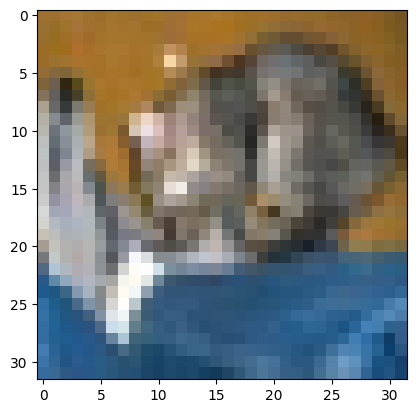

In [17]:
plt.imshow(X_test[0].reshape(size,size,chennel), cmap='gray')

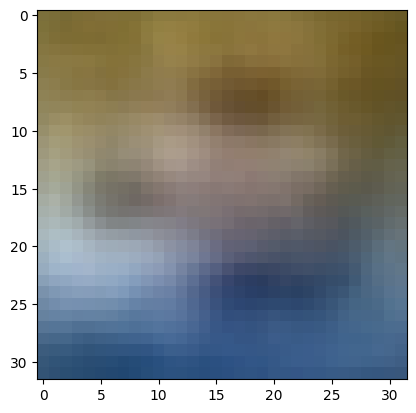

In [18]:
plt.imshow(model(test).numpy().reshape(size,size,chennel), cmap='gray')

# convolution 의 경우 layer가 쌓일 수록 사이즈가 작아기는 문제가 있으므로 decode하면서 사이즈를 다시 어떻게 복구 하는지 논문마다 확인할 것